![alt text](Slide1.PNG)

![alt text](Slide2.PNG)

![alt text](Slide3.PNG)

![alt text](Slide4.PNG)

![alt text](Slide5.PNG)

Diskon yang diberikan: 22.91%


C:\Users\paged\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


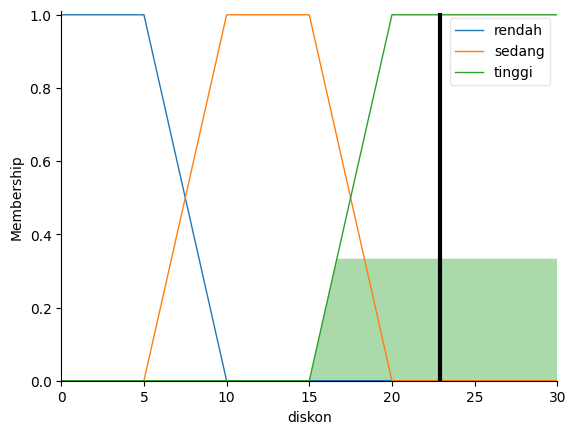

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisi variabel fuzzy
jumlah_pembelian = ctrl.Antecedent(np.arange(0, 101, 1), 'jumlah_pembelian')
frekuensi_pelanggan = ctrl.Antecedent(np.arange(0, 11, 1), 'frekuensi_pelanggan')
diskon = ctrl.Consequent(np.arange(0, 31, 1), 'diskon')

# Membership function
jumlah_pembelian['sedikit'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 20, 50])
jumlah_pembelian['sedang'] = fuzz.trapmf(jumlah_pembelian.universe, [30, 50, 50, 70])
jumlah_pembelian['banyak'] = fuzz.trapmf(jumlah_pembelian.universe, [50, 70, 100, 100])

frekuensi_pelanggan['jarang'] = fuzz.trapmf(frekuensi_pelanggan.universe, [0, 0, 2, 5])
frekuensi_pelanggan['sering'] = fuzz.trapmf(frekuensi_pelanggan.universe, [3, 5, 7, 10])
frekuensi_pelanggan['sangat_sering'] = fuzz.trapmf(frekuensi_pelanggan.universe, [7, 10, 10, 10])

diskon['rendah'] = fuzz.trapmf(diskon.universe, [0, 0, 5, 10])
diskon['sedang'] = fuzz.trapmf(diskon.universe, [5, 10, 15, 20])
diskon['tinggi'] = fuzz.trapmf(diskon.universe, [15, 20, 30, 30])

# Aturan fuzzy
rule1 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['jarang'], diskon['rendah'])
rule2 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['sering'], diskon['sedang'])
rule3 = ctrl.Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['sangat_sering'], diskon['tinggi'])

# Sistem kontrol fuzzy
diskon_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
penentuan_diskon = ctrl.ControlSystemSimulation(diskon_ctrl)

# Input data
penentuan_diskon.input['jumlah_pembelian'] = 70  # Input jumlah pembelian
penentuan_diskon.input['frekuensi_pelanggan'] = 8  # Input frekuensi pelanggan

# Komputasi
penentuan_diskon.compute()

# Output hasil
print(f"Diskon yang diberikan: {penentuan_diskon.output['diskon']:.2f}%")

# Visualisasi
diskon.view(sim=penentuan_diskon)
